# ADAPTIC PyProc postprocessor - simply supported beam

This notebook illustrates how to postprocess the results using *ADAPTIC PyProc*.

Below are images coming directly from ADAPTIC_shapes of the deformed simply supported beam.

Colour coding:
* blue - cbp elements
* red - jel elements
* green - lnk elements

|Deformed shape - centroidal lines|
|:-:|
|![image](../../assets/images/ssBeamDeflected1.png)|

|Deformed shape - quadrilaterals|
|:-:|
|![image](../../assets/images/ssBeamDeflected2.png)|

## Input

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../../libraries')
import adaptic as adpt

Import the model.

In [2]:
model = adpt.adaptic2D('ssBeam')

## Results

The specific results can be called using a method `model.attribute_create()` and then calling the attribute `model.attribute`. This method reads from *model.num* file the specific results. Alternatively, they can be returned as a matrix or vector directly by `model.returnVec("attribute",(idx))`. The parameter `idx` is optional and defines an index of the element of interest.

For example, below the two methods for `restrainedX` element 1 (node support 1) are applied. 

In [3]:
model.restrainedX_create()
model.restrainedX[1]

array([    0. ,     0. ,  1644.1, ..., 17588.2, 17606.8, 17625.3])

In [4]:
model.returnVec("restrainedX",1)

array([    0. ,     0. ,  1644.1, ..., 17588.2, 17606.8, 17625.3])

### Load vs displacements

Extract the reactions at the supports and plot against midspan node displacement.

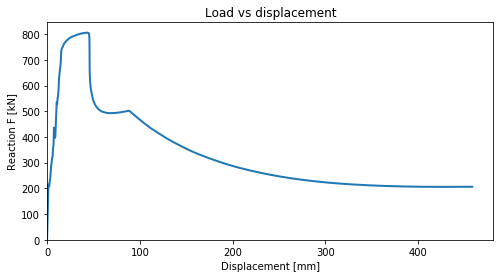

In [5]:
fig, ax = plt.subplots(figsize=(8,4))

curveX = -model.returnVec("nodeDispY",13) # node 13 Y displacements

react1 = model.returnVec("restrainedY",1)*1E-3 # support 1 Y-reactions
react2 = model.returnVec("restrainedY",2)*1E-3 # support 2 Y-reactions
curveY = react1 + react2

ax.plot(curveX, curveY,'-', linewidth=2, markersize=5)
ax.set_title("Load vs displacement")
ax.set_xlabel('Displacement [mm]')
ax.set_ylabel('Reaction F [kN]')
ax.set_xlim(0,None)
ax.set_ylim(0,None)
plt.show()

## Element forces

Extract forces for the midspan element (element 12). The axial forces in a simply supported beam should equilibrate to zero. As can be seen below, except some minimal initial oscilation, the axial forces are negligible.

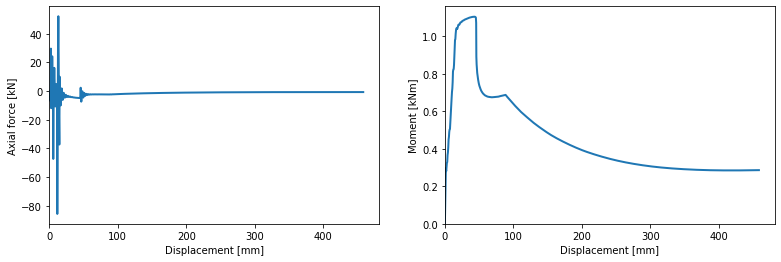

In [6]:
fig, ax = plt.subplots(1,2,figsize=(13,4))

curveX = -model.returnVec("nodeDispY",13) # node 13 Y displacements

# axial forces, element 12
F = model.returnVec("cbpF",12)*1E-3

# As the elements are reversed, call for node 1 result 
# which is on the right-hand side of element 12

# moment at node 1, element 12
M1 = model.returnVec("cbpM1",12)*1E-9

ax[0].plot(curveX, F,'-', linewidth=2, markersize=5)
ax[0].set_xlabel('Displacement [mm]')
ax[0].set_ylabel('Axial force [kN]')
ax[0].set_xlim(0,None)

ax[1].plot(curveX, M1,'-', linewidth=2, markersize=5)
ax[1].set_xlabel('Displacement [mm]')
ax[1].set_ylabel('Moment [kNm]')
ax[1].set_xlim(0,None)
ax[1].set_ylim(0,None)

plt.show()

### Strains and stress 

Strains and stresses for cbp are outputted in format *elementName_materialNumber* and stored in variable `model.gaussName`.

In [7]:
model.returnVec("gaussName")

array(['1_1', '1_2', '1_3', '2_1', '2_2', '2_3', '3_1', '3_2', '3_3',
       '4_1', '4_2', '4_3', '5_1', '5_2', '5_3', '6_1', '6_2', '6_3',
       '7_1', '7_2', '7_3', '8_1', '8_2', '8_3', '9_1', '9_2', '9_3',
       '10_1', '10_2', '10_3', '11_1', '11_2', '11_3', '12_1', '12_2',
       '12_3', '13_1', '13_2', '13_3', '14_1', '14_2', '14_3', '15_1',
       '15_2', '15_3', '16_1', '16_2', '16_3', '17_1', '17_2', '17_3',
       '18_1', '18_2', '18_3', '19_1', '19_2', '19_3', '20_1', '20_2',
       '20_3', '21_1', '21_2', '21_3', '22_1', '22_2', '22_3', '23_1',
       '23_2', '23_3', '24_1', '24_2', '24_3'], dtype='<U4')

or using `model.create()` method.

In [8]:
model.gaussName_create()
model.gaussName

array(['1_1', '1_2', '1_3', '2_1', '2_2', '2_3', '3_1', '3_2', '3_3',
       '4_1', '4_2', '4_3', '5_1', '5_2', '5_3', '6_1', '6_2', '6_3',
       '7_1', '7_2', '7_3', '8_1', '8_2', '8_3', '9_1', '9_2', '9_3',
       '10_1', '10_2', '10_3', '11_1', '11_2', '11_3', '12_1', '12_2',
       '12_3', '13_1', '13_2', '13_3', '14_1', '14_2', '14_3', '15_1',
       '15_2', '15_3', '16_1', '16_2', '16_3', '17_1', '17_2', '17_3',
       '18_1', '18_2', '18_3', '19_1', '19_2', '19_3', '20_1', '20_2',
       '20_3', '21_1', '21_2', '21_3', '22_1', '22_2', '22_3', '23_1',
       '23_2', '23_3', '24_1', '24_2', '24_3'], dtype='<U4')

Strain and stress in midspan element 12 against displacements.

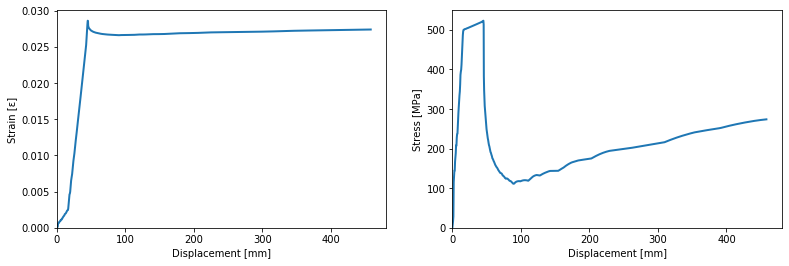

In [9]:
fig, ax = plt.subplots(1,2,figsize=(13,4))

curveX = -model.returnVec("nodeDispY",13) # node 13 Y displacements

# find the index for element 12, material number 1 in model.gaussName vector
idx = np.where(model.returnVec("gaussName") == '12_1')[0]

# as the elements are reversed to get the strains at the bottom fibre call for its top properties

# strains, gauss point 2, top (reinforcement)
strains = model.returnVec("gauss2StrainT",idx)

# stresses, gauss point 2, top (reinforcement)
stresses = model.returnVec("gauss2StressT",idx)

ax[0].plot(curveX, strains,'-', linewidth=2, markersize=5)
ax[0].set_xlabel('Displacement [mm]')
ax[0].set_ylabel('Strain [ε]')
ax[0].set_xlim(0,None)
ax[0].set_ylim(0,None)

ax[1].plot(curveX, stresses,'-', linewidth=2, markersize=5)
ax[1].set_xlabel('Displacement [mm]')
ax[1].set_ylabel('Stress [MPa]')
ax[1].set_xlim(0,None)
ax[1].set_ylim(0,None)

plt.show()